# Convex Routing Method (Box 10.6)

Here we apply the convex routing procedure to a fictitious inflow hydrograph and river reach. The steps follow the methods described in US Department of Agriculture (1982). SI units are assumed. The hydrograph of inflow to the channel reach is given, either as values of QIt or as a graph from which values of QIt can be determined. The development here does not consider lateral inflows; when required, these can be included as described in the above reference.

In [1]:
# Import numeric python and the plotting library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Inflow Hydrograph
q0 = 0 # [m^3/s]
qPeak = 36 # [m^3/s]
Trise = 1 # [hrs]
Trecession = 4 # [hrs]

# As a triangular hydrograph
qIn = [q0, qPeak, q0, q0];
time = [0, Trise, Trise+Trecession,8]

## Compute Reach Routing Coefficeint

The flow velocity is calcualted by equations 10.43b and 10.44. Together these give

$$ u = \frac{\varepsilon}{n_M}y^{2/3}s^{1/2} $$

where $s$ is the slope, $y$ is the depth, $n_M$ is the Mannings coefficient and $ \varepsilon $ is a unit conversation factor (1 for SI units here).

The flood-wave veloicty is 1.5 times the flow velocity (equation 10.53) as

$$ u_{flood} = 1.5 u $$

Now, given the flood wave velocity, the travel time ($T^*$) of the wave is the distance divided by the flood wave veloicty as

$$ T^* = \frac{X}{u_{flood}} $$

Finally, the routing coefficient ($CX$) is the ratio of the timestep ($\Delta t$) to the transit time as

$$ CX = \frac{\Delta t}{T^*} $$

Where it is important that both are in the same time units. Note that $\Delta t$ must be less than 1/5 the time to rise.

Additonally, we can combine the above into a single forumla (eq 10.57) as

$$ CX = \frac{1.5 u \Delta t}{X} = \frac{1.5 \varepsilon y^{2/3}s^{1/2} \Delta t}{n_M X} $$

Where again, it is important to check your units.



In [2]:
# Given Information:
X = 2500 # [m]
y = 1.94 # [m]
s = 0.0005 # [unitless]
n = 0.05 
epsilon = 1

# Calculate flow velocity
u = epsilon * y**(2/3) * s**(1/2)/ n
print('Flow velocity is %.2f m/s' % u)

# Estimate flood-wave velocity
u_flood = 1.5*u
print('Flood-wave velocity is %.2f m/s' % u_flood)

# Transit time
tStar = X/u_flood
print('Flood wave transit time is %.2f s' % tStar)
tStar_hrs = tStar/60/60
print('Flood wave transit time is %.2f hrs' % tStar_hrs)

# Routing Coefficient
deltaT_hours = 0.1
CX = deltaT_hours/tStar_hrs
print('The routing coefficient is %.2f (eq 10.54)' %CX)

# Combined formula
deltaT_Sec = deltaT_hours*60*60
CX = (1.5 * epsilon * y**(2/3) * s**(1/2) * deltaT_Sec) / (n * X)
print('The routing coefficient is %.2f (eq 10.57)' %CX)

Flow velocity is 0.70 m/s
Flood-wave velocity is 1.04 m/s
Flood wave transit time is 2395.88 s
Flood wave transit time is 0.67 hrs
The routing coefficient is 0.15 (eq 10.54)
The routing coefficient is 0.15 (eq 10.57)


## Resolve Outflow Hydrograph

Give the routing coefficient, we now estimate the outflow hydrograph for this reach. We create a timeseries that steps by $\delta t$ that lasts for 8 hours. 

Next, the outflow at the next timestep is calculated as the weighted sum of the inflow and outflow at each timestep, with $CX being the weighting factor. This is given by (eq. 10.56) as

$$ Q_{out}(t+1) = CX \; Q_{In}(t) + (1-CX) Q_{Out}(t) $$

This is implemented with a simple for-loop in the python code below.

In [3]:
# interpolate to a fine timescale
timeFine = np.arange(0, 8, deltaT_hours)
qInFine = np.interp(timeFine, time,qIn)
qOutFine = qInFine*0

# Translate the flow down the reach in time.
for i in np.arange(0,len(timeFine)-1):
    qOutFine[i+1] = CX*qInFine[i] + (1-CX)*qOutFine[i]
    

## Plot Results

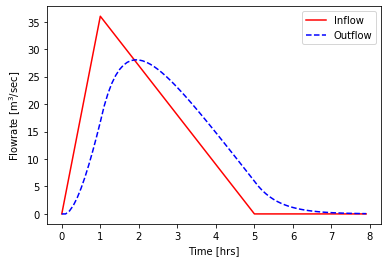

In [4]:
plt.plot(timeFine,qInFine,'r-',label='Inflow')
plt.plot(timeFine,qOutFine,'b--',label='Outflow')
plt.xlabel('Time [hrs]')
plt.ylabel('Flowrate [m$^3$/sec]')
plt.legend()